In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("C:/Users/asus/Downloads/retail_sales_dataset.csv")
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [12]:
data.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


# Descriptive Statistics

In [14]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# Time Series Analysis

In [19]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

In [21]:
monthly_sales = data.resample('M')['Total Amount'].sum()

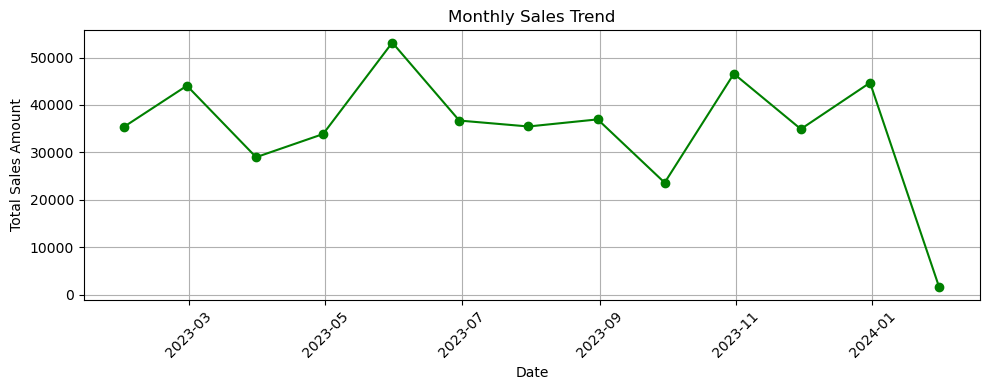

In [25]:
# Plotting
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color = 'g')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Customer Demographics Analysis

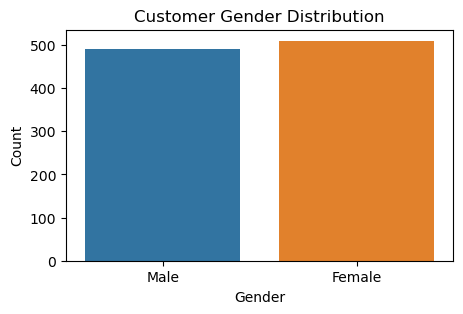

In [27]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=data)
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

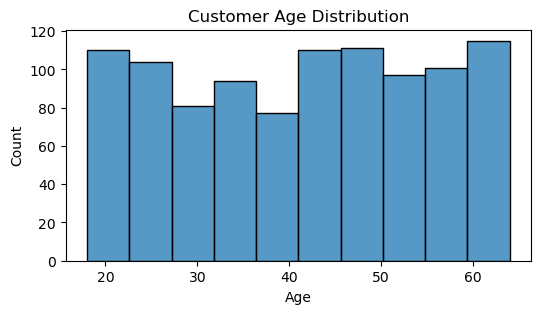

In [33]:
plt.figure(figsize=(6, 3))
sns.histplot(data['Age'], bins=10)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [36]:
# Average total amount spent per transaction by gender
avg_spent_gender = data.groupby('Gender')['Total Amount'].mean()
print("Average Total Amount Spent per Transaction by Gender:\n", avg_spent_gender)

Average Total Amount Spent per Transaction by Gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


# Purchasing Behavior Analysis

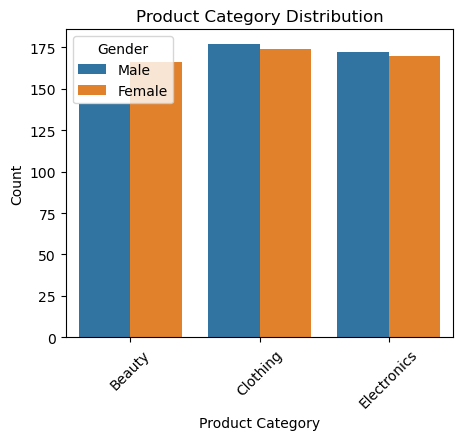

In [46]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Product Category', data=data, hue='Gender')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization

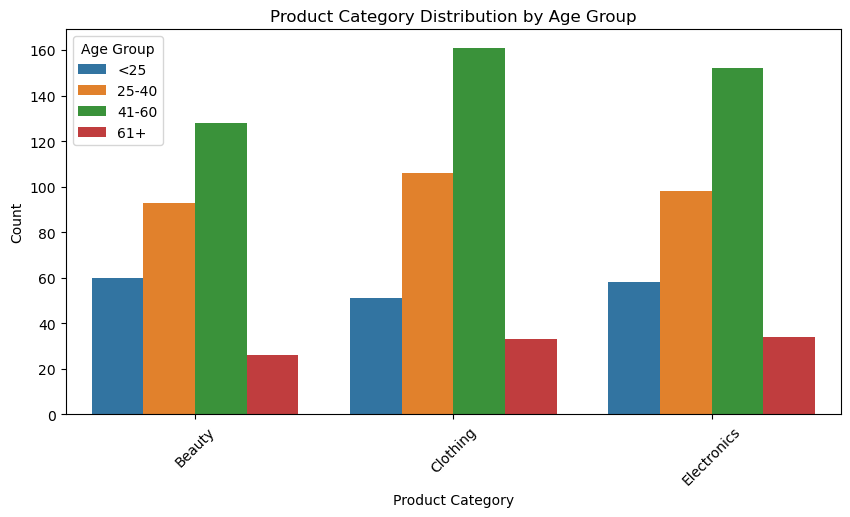

In [50]:
data['Age Group'] = pd.cut(data['Age'],bins =[0, 25, 40, 60, 100], labels=['<25', '25-40', '41-60', '61+'])

# Product Category Distribution by Age Group
plt.figure(figsize=(10, 5))
sns.countplot(x='Product Category', hue='Age Group', data=data)
plt.title('Product Category Distribution by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()

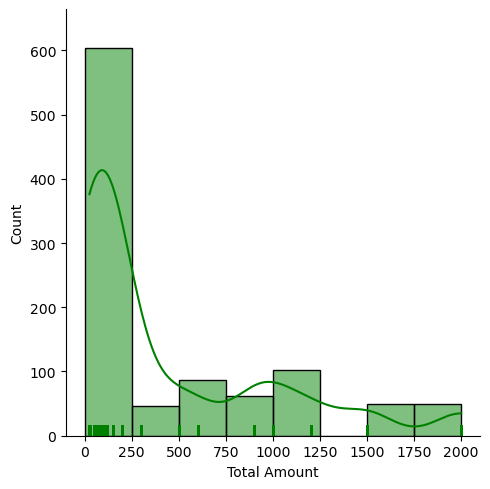

In [56]:
sns.displot(data["Total Amount"],bins=[0,250,500,750,1000,1250,1500,1750,2000], kde=True, rug=True, color="g")
plt.show()

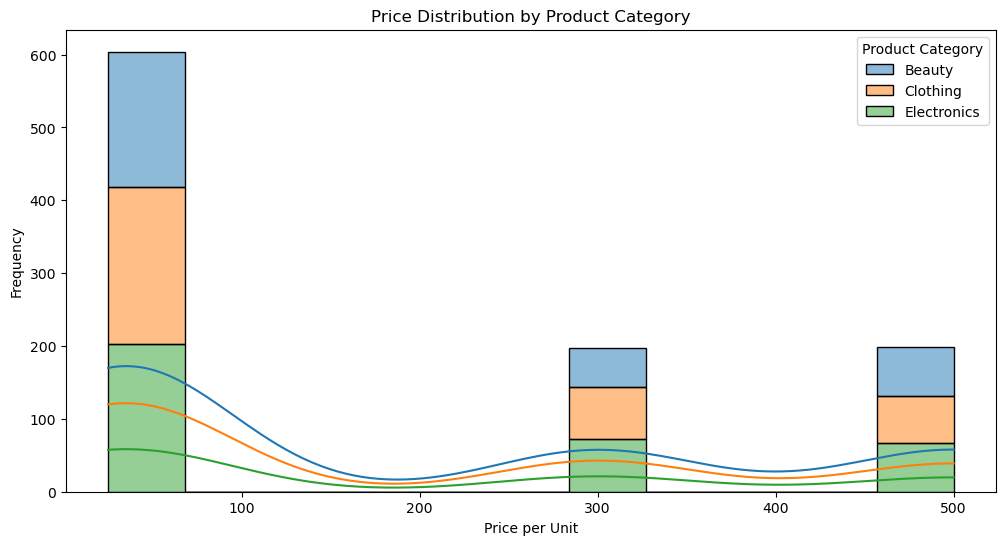

In [59]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Price per Unit', hue='Product Category', multiple='stack', kde=True)
plt.title('Price Distribution by Product Category')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()